In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats

In [3]:
df = pd.read_csv('./data/mc-2016.csv')
print(df.ix[0,:])

company_id                                                        578
guid                             8564454b-f39e-c1bf-45b1-5166bf8bdb10
subject                                               My M&M's & More
from                [{"address":"noreply@r.groupon.com","name":"Gr...
reply_to                                                          NaN
mobile_optimized                                                    t
sent_at                                           2016-06-12 20:17:25
animated                                                            f
body_bytes                                                      53936
image_bytes                                                    175079
Name: 0, dtype: object


In [4]:
df['image_mb'] = df['image_bytes'] / 1000000
print(df.ix[0,:])

company_id                                                        578
guid                             8564454b-f39e-c1bf-45b1-5166bf8bdb10
subject                                               My M&M's & More
from                [{"address":"noreply@r.groupon.com","name":"Gr...
reply_to                                                          NaN
mobile_optimized                                                    t
sent_at                                           2016-06-12 20:17:25
animated                                                            f
body_bytes                                                      53936
image_bytes                                                    175079
image_mb                                                     0.175079
Name: 0, dtype: object


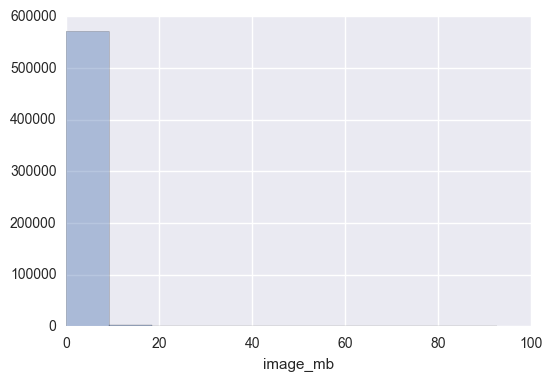

In [6]:
x = df['image_mb']
sns.distplot(x, kde=False, bins=10);

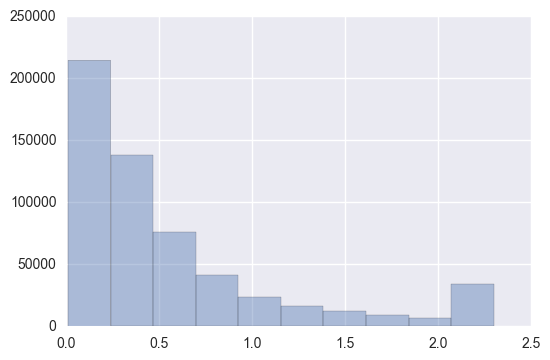

In [7]:
# let's remove outliers
y = scipy.stats.mstats.winsorize(x, limits=0.05)
sns.distplot(y, kde=False, bins=10);

//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


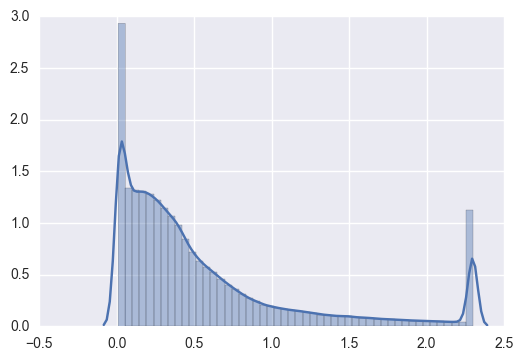

In [7]:
sns.distplot(y);

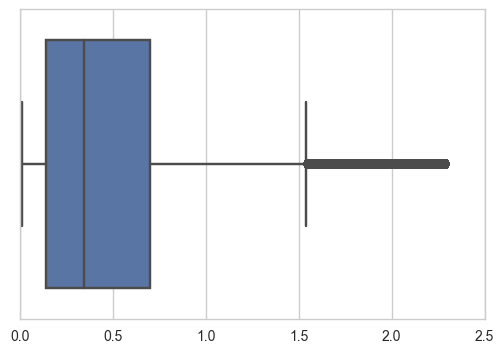

In [8]:
sns.set_style("whitegrid")
sns.boxplot(y)

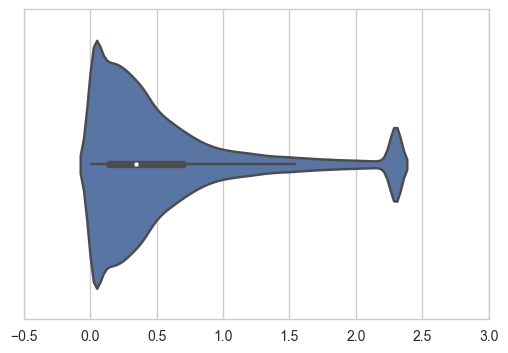

In [9]:
sns.violinplot(y)

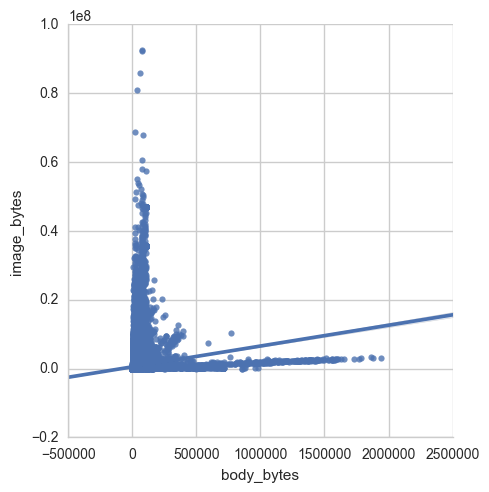

In [ ]:
# For our two continuous variables, let's pick body_bytes and image_bytes

sns.lmplot('body_bytes', 'image_bytes', df)

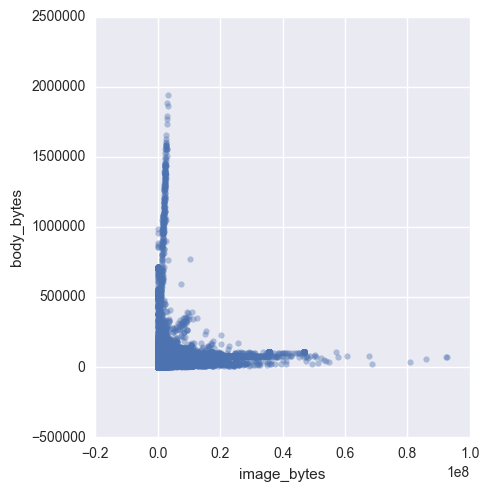

In [5]:
sns.lmplot(y='body_bytes', x='image_bytes', data=df, fit_reg=False, scatter_kws={'alpha':0.4})

In [ ]:
# Let's now look at mobile_optimized against image_mb
animated = df['animated']
size = df['image_mb']

sns.stripplot(animated, size)


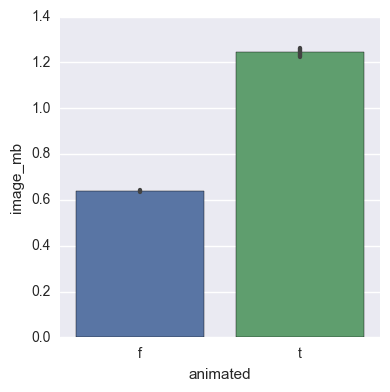

In [11]:
sns.factorplot(x="animated", y="image_mb", data=df, kind="bar")

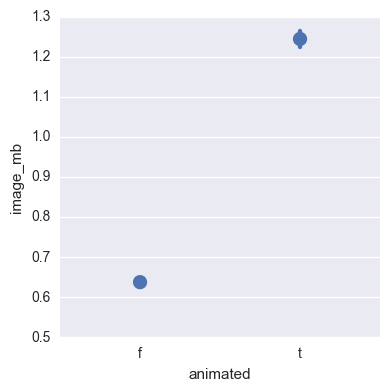

In [13]:
sns.factorplot(x="animated", y="image_mb", data=df, kind="point", join=False)

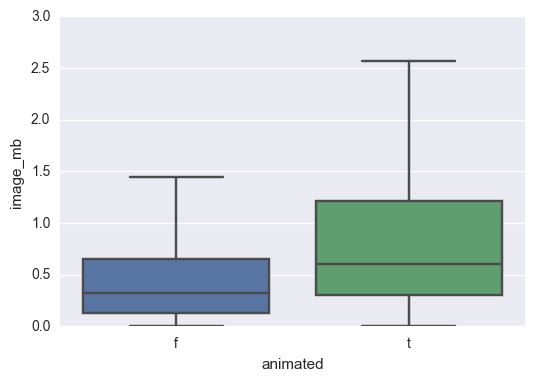

In [11]:
sns.boxplot(x="animated", y="image_mb", data=df, showfliers=False)

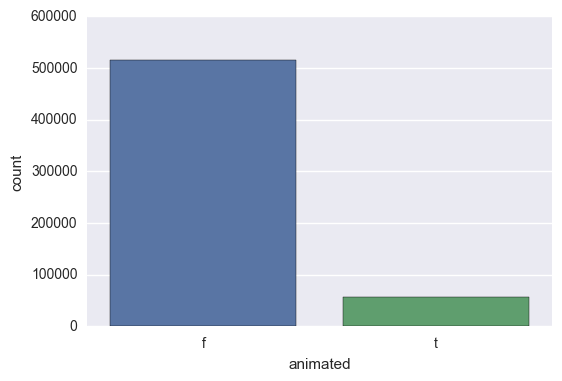

In [13]:
sns.countplot(x="animated", data=df)